# **Taller de Imputación de Datos**

## Configuración Inicial

Primero, importamos todas las librerías que necesitaremos a lo largo del taller.

In [20]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Pruebas estadísticas
from scipy import stats

# Configuración para visualizaciones
PALETA = {
    'antes': '#348ABD',  # Azul
    'despues_ok': '#46B39D', # Verde azulado (Teal)
    'despues_peligro': '#E24A33' # Rojo coral
}
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Exploración Inicial de las Variables

In [21]:
# Cargar el dataset desde la URL de GitHub
url = 'https://raw.githubusercontent.com/Kalbam/Datos/main/base_imputacion_mixta_1000.csv'
df = pd.read_csv(url)



# Observar la estructura general
print("Primeras 5 filas del dataset:")
display(df.head())

print("\nInformación general y tipos de datos:")
df.info()



Primeras 5 filas del dataset:


,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
0,2024-01-01,F,Medellín,NaN,B,Unión libre,19.0,161.821754,3574.753806,1832.731832,640.465372,119.202995
1,2024-01-02,F,Barranquilla,NaN,B,NaN,52.0,167.819566,3163.626815,NaN,533.108430,124.457874
2,2024-01-03,M,Bogotá,Secundaria,B,Soltero/a,38.0,165.756219,2765.672259,1219.535074,491.016910,NaN
3,2024-01-04,F,Bogotá,NaN,B,Casado/a,57.0,160.642670,4320.397345,1908.324816,NaN,129.426792
4,2024-01-05,M,Cali,Técnico,B,Soltero/a,67.0,151.402909,NaN,1887.385697,610.213994,133.916319



Información general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               1000 non-null   object 
 1   sexo                980 non-null    object 
 2   ciudad              950 non-null    object 
 3   nivel_educativo     900 non-null    object 
 4   segmento            800 non-null    object 
 5   estado_civil        650 non-null    object 
 6   edad                970 non-null    float64
 7   altura_cm           920 non-null    float64
 8   ingresos            880 non-null    float64
 9   gasto_mensual       750 non-null    float64
 10  puntuacion_credito  500 non-null    float64
 11  demanda             850 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [22]:
print("\nEstadísticas descriptivas para todas las variables:")
display(df.describe(include='all'))


Estadísticas descriptivas para todas las variables:


,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
count,1000,980,950,900,800,650,970.000000,920.000000,880.000000,750.000000,500.000000,850.000000
unique,1000,2,5,4,3,4,NaN,NaN,NaN,NaN,NaN,NaN
top,2026-09-26,F,Bogotá,Secundaria,B,Soltero/a,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,518,307,317,457,290,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,42.861856,167.760096,3681.294745,1687.810749,599.077500,160.305759
std,NaN,NaN,NaN,NaN,NaN,NaN,14.621382,9.275530,1079.326096,582.070174,79.828186,25.357794
min,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,140.000000,487.662547,100.000000,373.657944,99.875828
25%,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,161.488768,2999.416229,1309.239768,544.467843,139.505538
50%,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,167.714614,3669.620507,1676.193764,599.692595,160.721251
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,173.999069,4375.093656,2063.260990,653.345068,181.100754


## Clasificación de Variables
**Variables Numéricas:**
- `edad`, `altura_cm`, `ingresos`, `gasto_mensual`: Continuas.
- `puntuacion_credito`, `demanda`: Numéricas continuas

**Variables Categóricas:**
- `sexo`, `ciudad`, `estado_civil`: Nominales (sin jerarquía)
- `nivel_educativo`, `segmento`: Ordinales (orden inherente)

**Variable Temporal:**
- `fecha`: Actualmente como `object` - **requiere conversión a `datetime64` para análisis temporal**

## 2. Detección de Valores Faltantes

In [23]:
# Calcular el número y porcentaje de valores faltantes por variable
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame para mostrar los resultados
missing_info = pd.DataFrame({
    'Nulos': missing_values,
    'Porcentaje (%)': missing_percentage
})

# Filtrar solo las variables con valores faltantes y ordenar
missing_info = missing_info[missing_info['Nulos'] > 0].sort_values(by='Porcentaje (%)', ascending=False)

print("Resumen de valores faltantes:")
display(missing_info)

Resumen de valores faltantes:


,Nulos,Porcentaje (%)
puntuacion_credito,500,50.0
estado_civil,350,35.0
gasto_mensual,250,25.0
segmento,200,20.0
demanda,150,15.0
ingresos,120,12.0
nivel_educativo,100,10.0
altura_cm,80,8.0
ciudad,50,5.0
edad,30,3.0


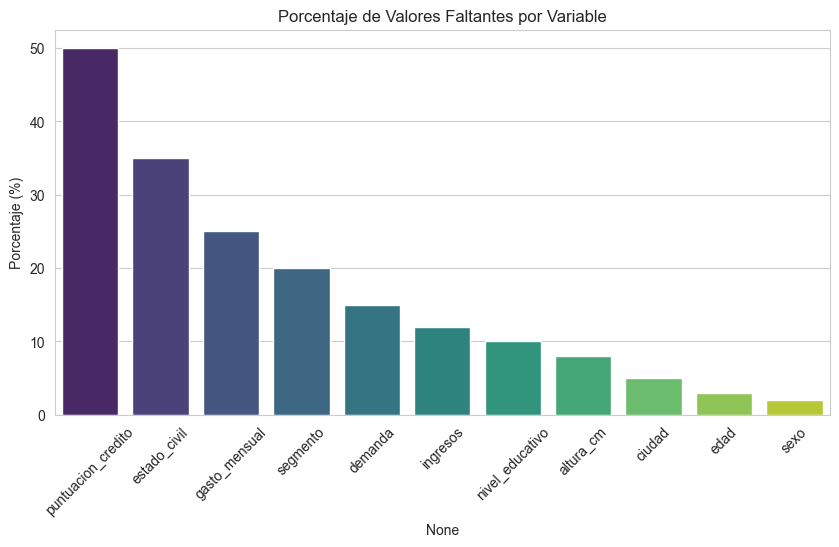


Mapa de calor de la distribución de valores faltantes:


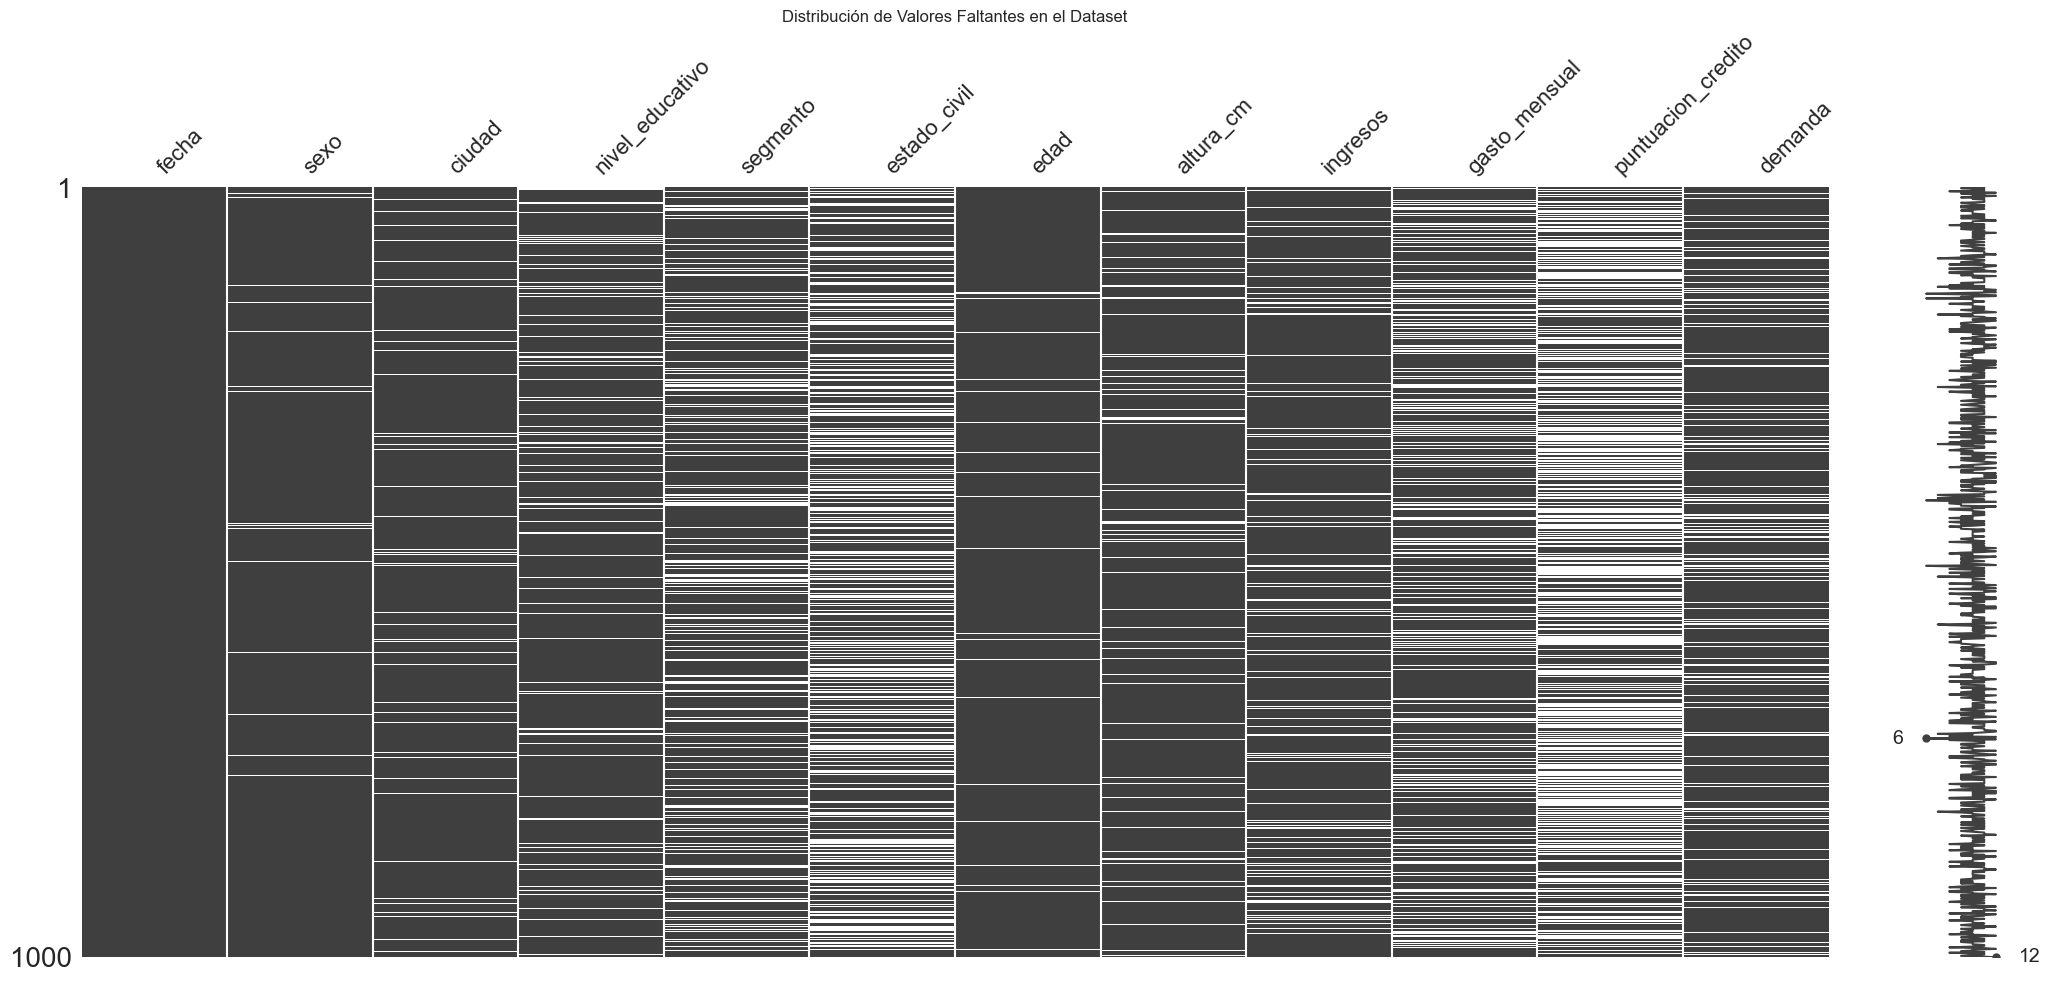

In [24]:
# Representación gráfica de los nulos

# 1. Gráfico de barras con el porcentaje de nulos
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_info.index, y=missing_info['Porcentaje (%)'], hue=missing_info.index, palette='viridis', legend=False)
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.show()

# 2. Mapa de calor (matriz de nulidad)
print("\nMapa de calor de la distribución de valores faltantes:")
msno.matrix(df)
plt.title('Distribución de Valores Faltantes en el Dataset')
plt.show()

## Clasificación de Patrones de datos faltantes

**Análisis hipotético basado en porcentajes y naturaleza de variables:**

**MNAR (No Aleatorio):**
- `puntuacion_credito` (50%): Ausencia sistemática - jóvenes sin historial crediticio o ingresos insuficientes para evaluación
- `estado_civil` (35%): Sensibilidad personal - reluctancia selectiva según categoría (divorciados/viudos vs solteros)
- `gasto_mensual` (25%): Auto-censura en extremos - gastos muy altos/bajos menos reportados
- `ingresos` (12%): Clásico MNAR - ocultamiento por privacidad en rangos extremos
- `nivel_educativo` (10%): Sesgo de reporte - niveles bajos menos declarados

**MAR (Aleatorio Observable):**
- `segmento` (20%): Dependiente de `ciudad` - segmentación inexistente para ciertas ubicaciones

**MCAR (Completamente Aleatorio):**
- `altura_cm`, `ciudad`, `edad`, `sexo` (2-8%): Errores de captura aleatorios, fallos técnicos

> **Implicación metodológica:** MNAR requiere modelos de imputación sofisticados o análisis de sensibilidad. MAR permite imputación condicional. MCAR admite eliminación listwise sin sesgo.


### 5. Aplicación y Representación de la Imputación

**Enfoque metodológico por tipo:**

**Imputación Conservadora (MCAR):**
- `edad`, `altura_cm`: Mediana (robusta a outliers)
- `sexo`, `ciudad`, `nivel_educativo`: Moda (preserva distribución original)

**Imputación por Moda agrupada (MAR):**
- `segmento`: Segmento más frecuente para cada ciudad.

**Categoría Explícita (MNAR Alto):**
- `estado_civil`: Nueva categoría 'No_Informado' (evita sesgo de imputación)

**Imputación Relacional (MAR/MNAR Moderado):**
- `ingresos`, `gasto_mensual`: KNN multivariado (captura correlaciones)

**Demostración de Riesgo:**
- `puntuacion_credito`: KNN - visualizaremos distorsión distribucional y correlacional


---
#### **Imputación Simple (Mediana y Moda)**

Comenzamos con las imputaciones más seguras y directas.

In [25]:
def comparar_distribucion(df_antes, df_despues, columna):
    """
    Genera gráficos comparativos de la distribución de una variable antes y después de la imputación.
    Formatea automáticamente los títulos de los gráficos.

    Args:
        df_antes (pd.DataFrame): DataFrame antes de la imputación.
        df_despues (pd.DataFrame): DataFrame después de la imputación.
        columna (str): El nombre de la columna a comparar.
    """
    titulo_columna = columna.replace('_', ' ').title()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Verificar si la columna es numérica o categórica para elegir el gráfico adecuado
    if pd.api.types.is_numeric_dtype(df_antes[columna]):
        # Gráfico para variables numéricas (histograma)
        sns.histplot(df_antes[columna].dropna(), kde=True, ax=axes[0], color=PALETA['antes'], bins=20)
        axes[0].set_title(f'{titulo_columna} - Antes de Imputar')
        sns.histplot(df_despues[columna], kde=True, ax=axes[1], color=PALETA['despues_ok'], bins=20)
        axes[1].set_title(f'{titulo_columna} - Después de Imputar')
        plt.suptitle(f'Comparación de Distribución de {titulo_columna}', fontsize=16)
    else:
        # Gráfico para variables categóricas (gráfico de conteo)
        sns.countplot(x=columna, data=df_antes, ax=axes[0], color=PALETA['antes'], order=df_antes[columna].value_counts().index)
        axes[0].set_title(f'{titulo_columna} - Antes de Imputar')
        axes[0].tick_params(axis='x', rotation=45)
        sns.countplot(x=columna, data=df_despues, ax=axes[1], color=PALETA['despues_ok'], order=df_despues[columna].value_counts().index)
        axes[1].set_title(f'{titulo_columna} - Después de Imputar')
        axes[1].tick_params(axis='x', rotation=45)
        plt.suptitle(f'Comparación de Frecuencia de {titulo_columna}', fontsize=16)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [26]:
# Crear una copia del DataFrame para las imputaciones
df_imputado = df.copy()

# Imputación con Mediana para numéricas con pocos nulos
median_altura = df_imputado['altura_cm'].median()
df_imputado['altura_cm'] = df_imputado['altura_cm'].fillna(median_altura)

median_edad = df_imputado['edad'].median()
df_imputado['edad'] = df_imputado['edad'].fillna(median_edad)

# Imputación con Moda para categóricas con pocos nulos
mode_ciudad = df_imputado['ciudad'].mode()[0]
df_imputado['ciudad'] = df_imputado['ciudad'].fillna(mode_ciudad)

mode_sexo = df_imputado['sexo'].mode()[0]
df_imputado['sexo'] = df_imputado['sexo'].fillna(mode_sexo)

mode_nivel_educativo = df_imputado['nivel_educativo'].mode()[0]
df_imputado['nivel_educativo'] = df_imputado['nivel_educativo'].fillna(mode_nivel_educativo)


**Visualización Comparativa**

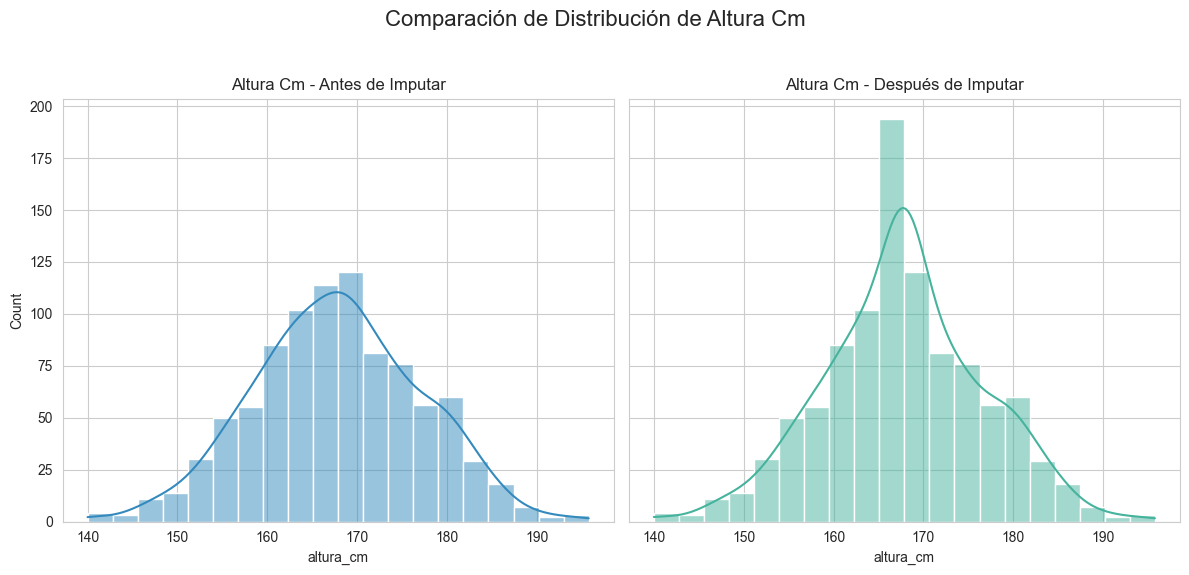

In [27]:
# Gráficos comparativos para altura_cm
comparar_distribucion(df, df_imputado, 'altura_cm')

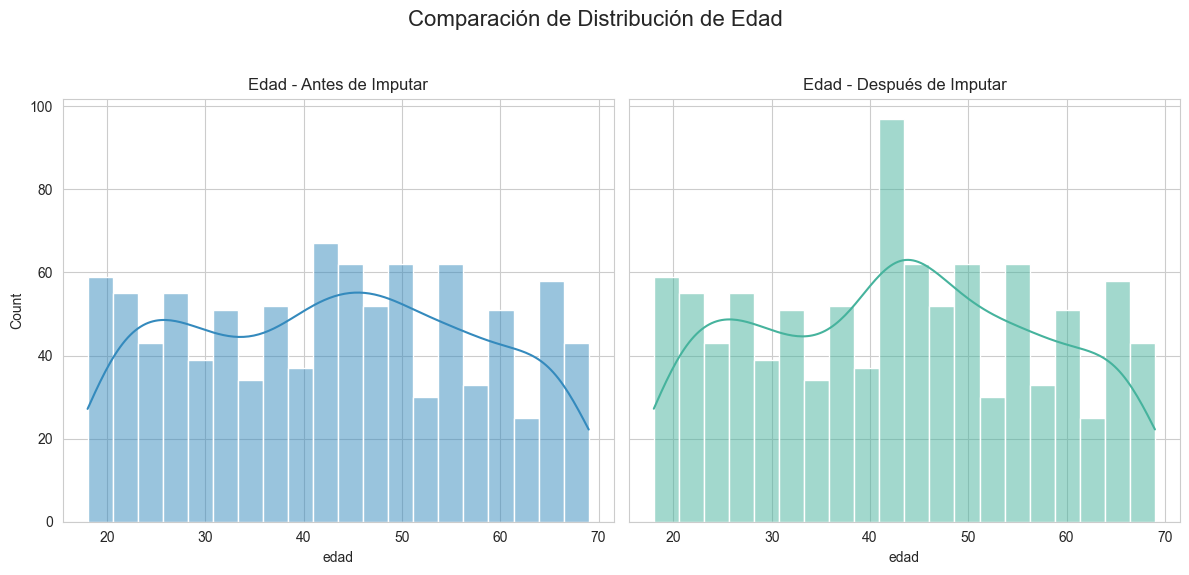

In [28]:
# Gráficos comparativos para edad
comparar_distribucion(df, df_imputado, 'edad')

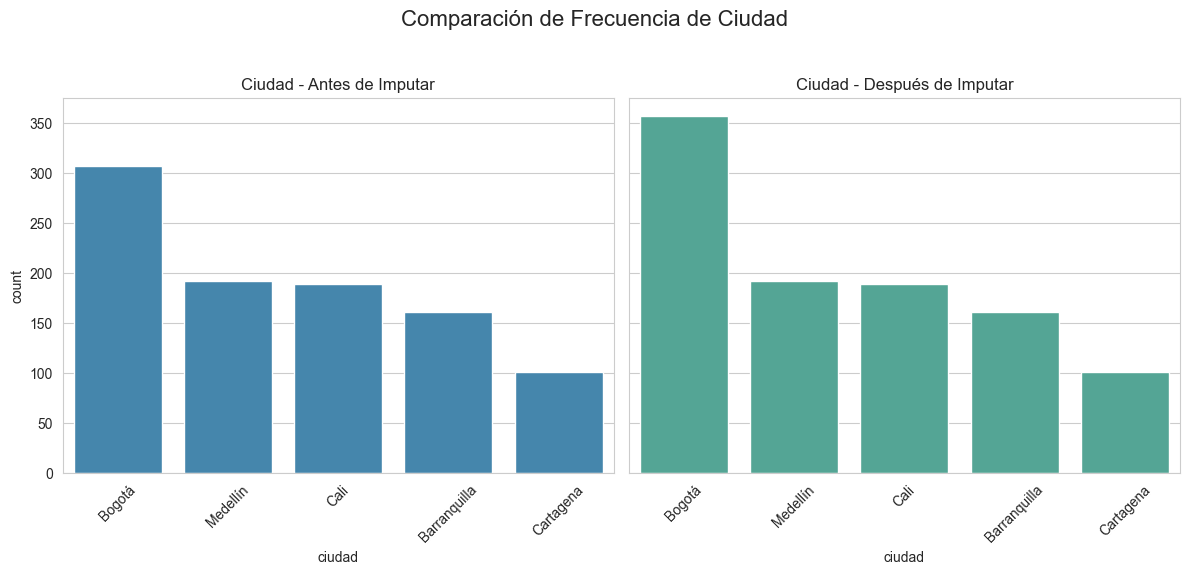

In [29]:
# Gráficos comparativos para ciudad
comparar_distribucion(df, df_imputado, 'ciudad')

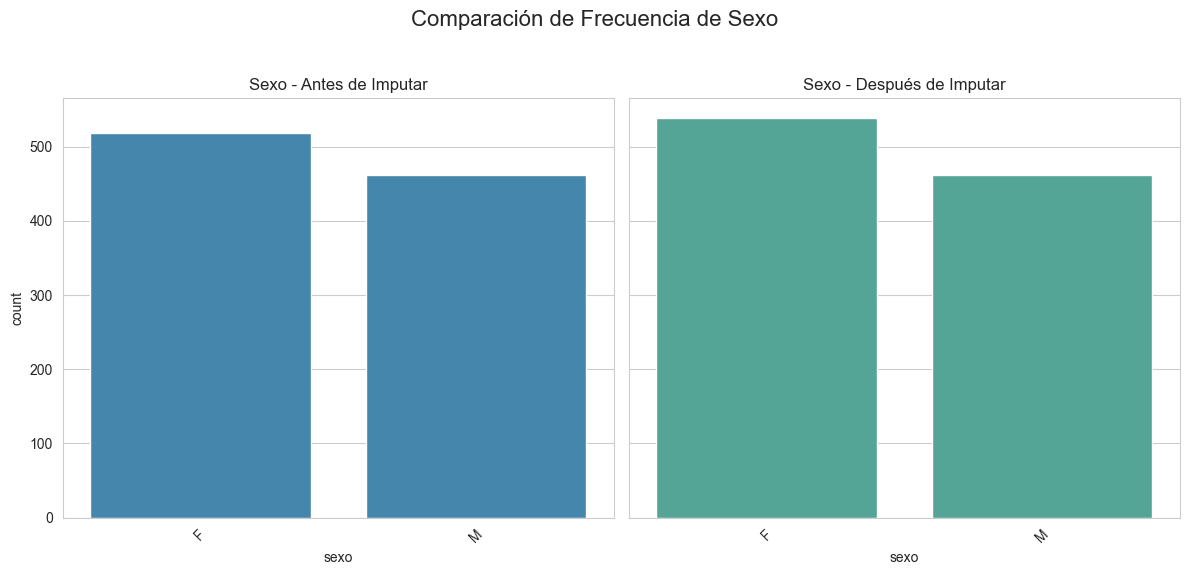

In [30]:
# Gráficos comparativos para sexo
comparar_distribucion(df, df_imputado, 'sexo')

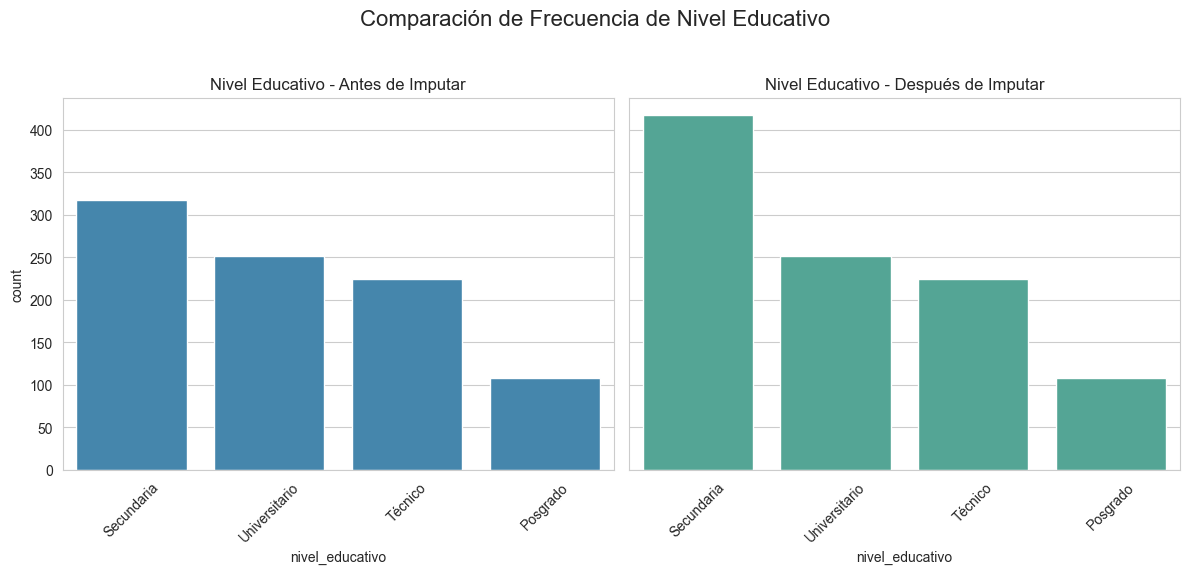

In [31]:
# Gráficos comparativos para nivel_educativo
comparar_distribucion(df, df_imputado, 'nivel_educativo')

#### **Imputación por Moda Agrupada (`segmento`)**
Dado que la ausencia depende de otra categoría, la imputación por Moda agrupada imputaría el segmento más frecuente para cada ciudad.


In [32]:
# Imputación de 'segmento' usando la moda de cada grupo 'ciudad'
df_imputado['segmento'] = df_imputado.groupby('ciudad')['segmento'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

# Verificar si aún quedan nulos en 'segmento'
print("Nulos restantes en 'segmento':", df_imputado['segmento'].isnull().sum())

Nulos restantes en 'segmento': 0


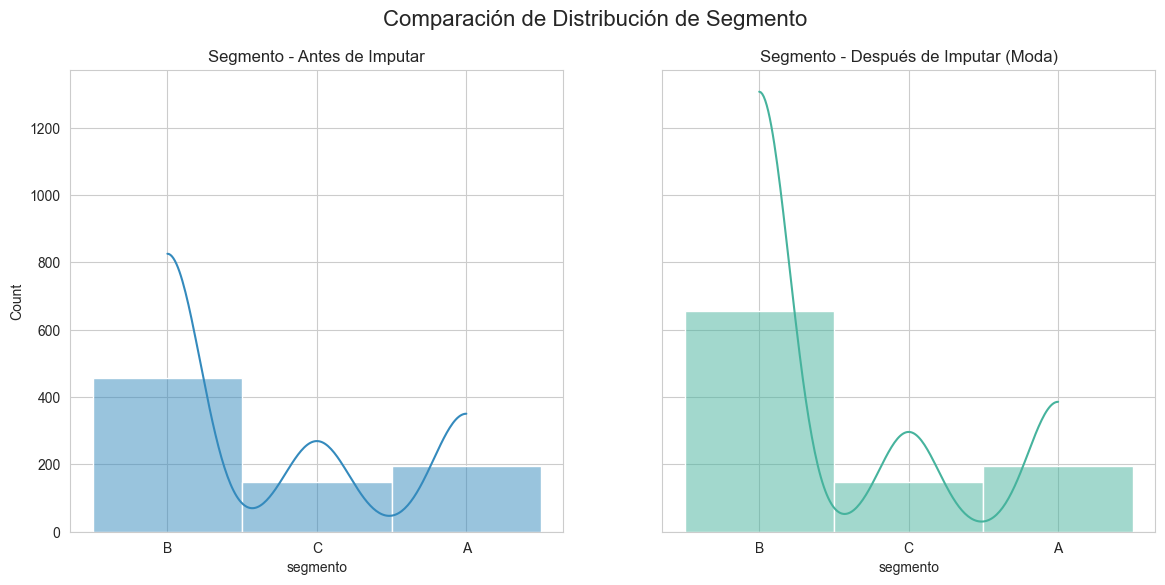

In [33]:
# Gráficos comparativos para segmento
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(df['segmento'].dropna(), kde=True, ax=axes[0], color=PALETA['antes'], bins=20)
axes[0].set_title('Segmento - Antes de Imputar')
sns.histplot(df_imputado['segmento'], kde=True, ax=axes[1], color=PALETA['despues_ok'], bins=20)
axes[1].set_title('Segmento - Después de Imputar (Moda)')
plt.suptitle('Comparación de Distribución de Segmento', fontsize=16)
plt.show()

#### **Creación de Nueva Categoría (`estado_civil`)**

Para `estado_civil`, en lugar de forzar una categoría existente, reconocemos la ausencia como información.

In [34]:
# Imputar con una nueva categoría 'No Informado'

df_imputado['estado_civil'] = df_imputado['estado_civil'].fillna('No Informado')

**Visualización Comparativa (`estado_civil`)**

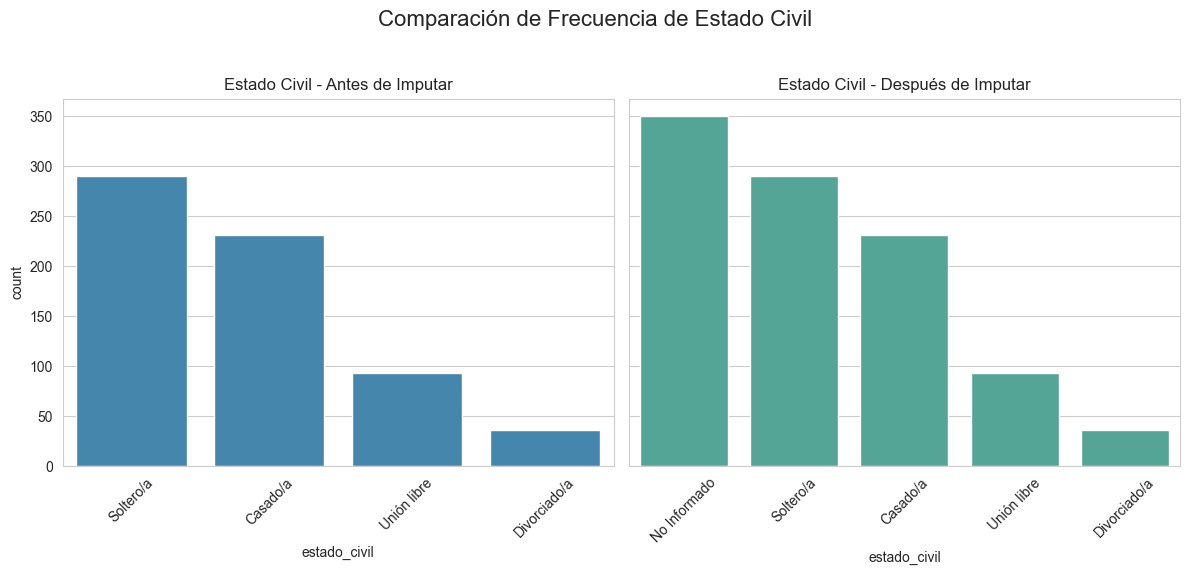

In [35]:
# Gráficos comparativos para estado_civil
comparar_distribucion(df, df_imputado, 'estado_civil')

*Observación: La nueva categoría 'No Informado' es ahora la segunda más frecuente, capturando el patrón de ausencia sin distorsionar las categorías originales.*

#### **Paso 3: Imputación Multivariada con KNN**

Ahora usamos KNN para las variables numéricas más complejas, incluyendo nuestro caso de estudio `puntuacion_credito`.

In [36]:
# Seleccionar las columnas numéricas para KNN (incluyendo las ya imputadas para ayudar al modelo)
numeric_cols_knn = ['edad', 'altura_cm', 'ingresos', 'gasto_mensual', 'puntuacion_credito', 'demanda']

# Crear e instanciar el imputador KNN
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)

# Aplicar la imputación
df_imputado[numeric_cols_knn] = imputer_knn.fit_transform(df_imputado[numeric_cols_knn])

# Verificar que no queden nulos
print(df_imputado[numeric_cols_knn].isnull().sum())

edad                  0
altura_cm             0
ingresos              0
gasto_mensual         0
puntuacion_credito    0
demanda               0
dtype: int64



**Visualización Comparativa (`gasto_mensual`,`ingresos`,`demanda` y `puntuacion_credito`)**

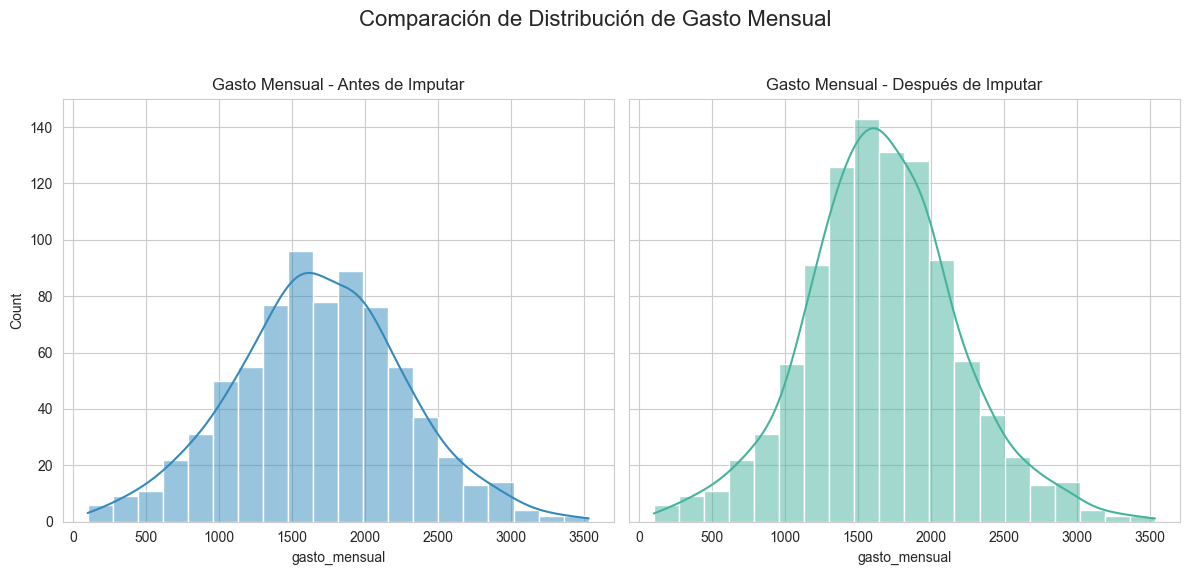

In [37]:
# Gráficos comparativos para gasto_mensual
comparar_distribucion(df, df_imputado, 'gasto_mensual')

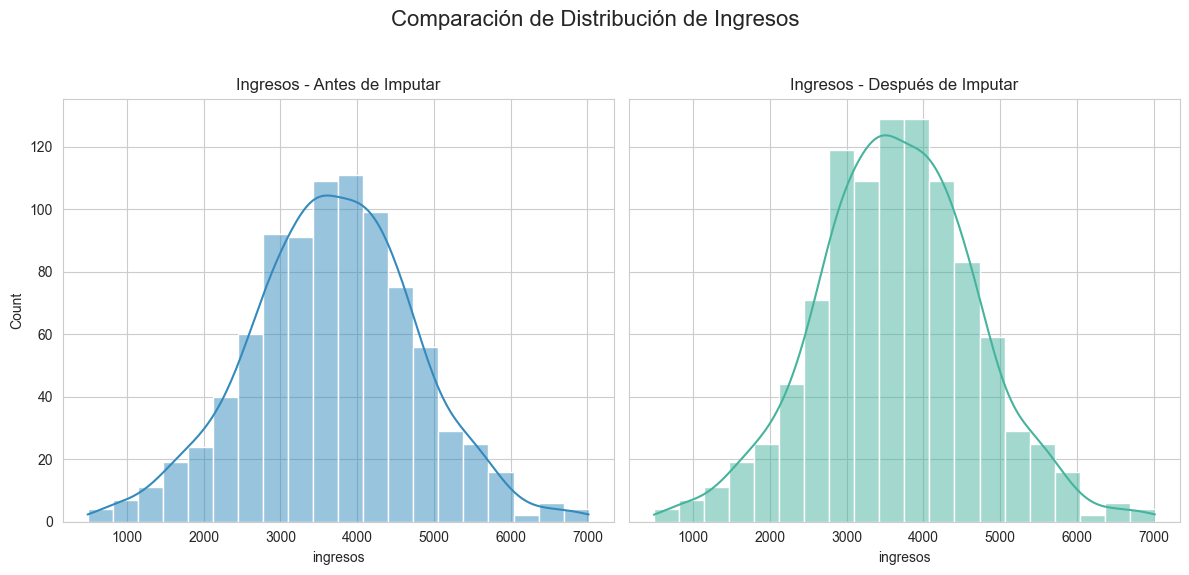

In [38]:
# Gráficos comparativos para ingresos
comparar_distribucion(df, df_imputado, 'ingresos')

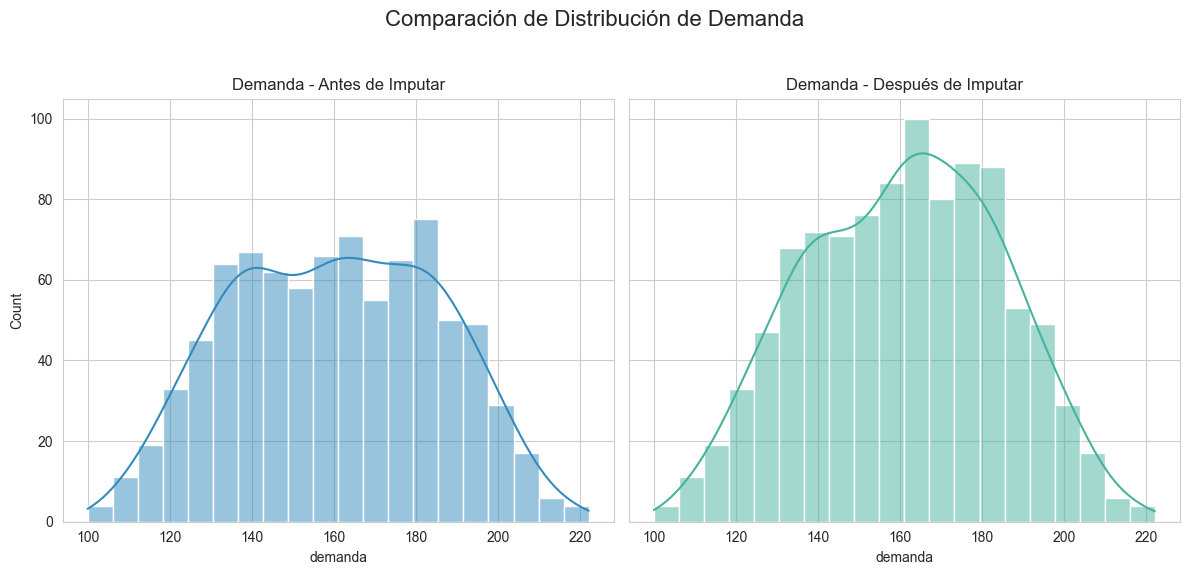

In [39]:
# Gráficos comparativos para demanda
comparar_distribucion(df, df_imputado, 'demanda')

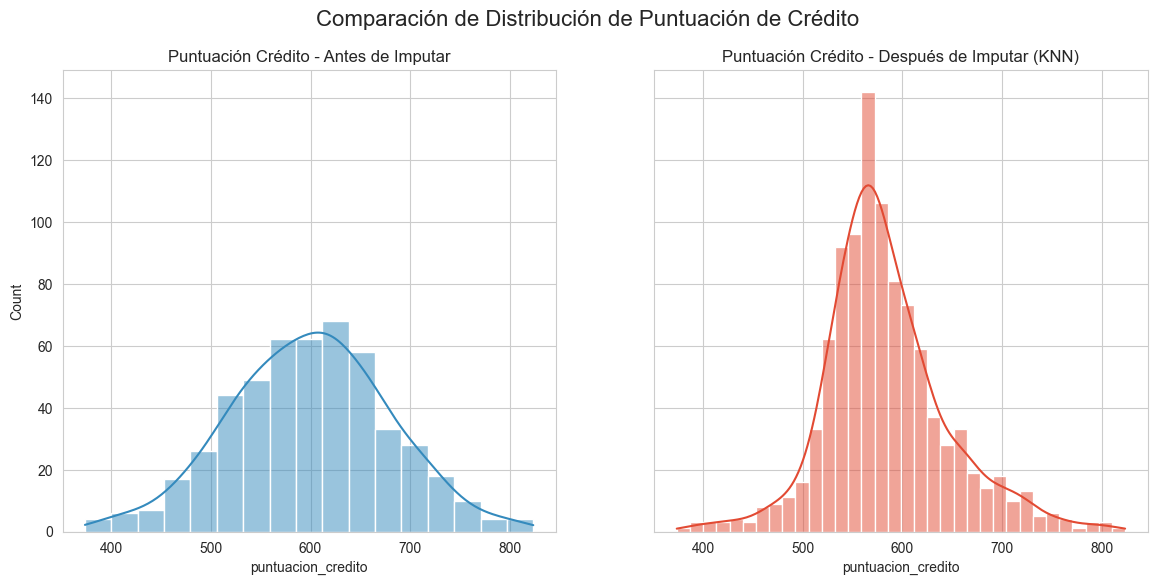

In [40]:
# Gráficos para puntuacion_credito (el caso problemático)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(df['puntuacion_credito'].dropna(), kde=True, ax=axes[0], color=PALETA['antes'])
axes[0].set_title('Puntuación Crédito - Antes de Imputar')
sns.histplot(df_imputado['puntuacion_credito'], kde=True, ax=axes[1], color=PALETA['despues_peligro'])
axes[1].set_title('Puntuación Crédito - Después de Imputar (KNN)')
plt.suptitle('Comparación de Distribución de Puntuación de Crédito', fontsize=16)
plt.show()

*Observación: En el gráfico de `puntuacion_credito`, se observa un pico artificial muy pronunciado en el centro de la distribución. Este es el resultado directo de imputar el 50% de los datos. El algoritmo KNN, al no encontrar vecinos suficientemente variados, tiende a converger en valores promedio, creando una distribución falsa que no refleja la realidad.*

### 6. Evaluación de la Imputación

Ahora, validaremos estadísticamente si las imputaciones alteraron significativamente las distribuciones originales de las variables numéricas. Usaremos la misma función de evaluación con las pruebas de **Shapiro-Wilk**, **Kolmogorov-Smirnov** y **Mann-Whitney U**.

**Recordatorio de Hipótesis Nula (H0):**
-   **Shapiro-Wilk:** Los datos provienen de una distribución normal.
-   **K-S y Mann-Whitney U:** Las dos muestras (original e imputada) provienen de la misma distribución.
-   **Regla:** Si **p-valor < 0.05**, rechazamos la H0.

In [41]:
def evaluar_imputacion(df_original, df_imputado, columna):
    """
    Función para realizar pruebas estadísticas y evaluar el efecto de la imputación en una columna.
    """
    print(f"--- Evaluación para la columna: {columna} ---")
    
    # Extraer las distribuciones
    dist_original = df_original[columna].dropna()
    dist_imputada = df_imputado[columna]
    
    # 1. Prueba de Normalidad (Shapiro-Wilk) sobre los datos originales
    shapiro_stat, shapiro_p = stats.shapiro(dist_original)
    print(f"\n1. Prueba de Normalidad (Shapiro-Wilk) para datos originales:")
    print(f"   Estadístico = {shapiro_stat:.3f}, p-valor = {shapiro_p:.3e}")
    if shapiro_p < 0.05:
        print("   Conclusión: Los datos originales NO siguen una distribución normal (p < 0.05).")
        es_normal = False
    else:
        print("   Conclusión: No se puede rechazar que los datos originales sigan una distribución normal (p >= 0.05).")
        es_normal = True
        
    # 2. Prueba de Igualdad de Distribuciones (Kolmogorov-Smirnov)
    ks_stat, ks_p = stats.ks_2samp(dist_original, dist_imputada)
    print(f"\n2. Prueba de Igualdad de Distribuciones (Kolmogorov-Smirnov):")
    print(f"   Estadístico = {ks_stat:.3f}, p-valor = {ks_p:.3e}")
    if ks_p < 0.05:
        print("   Conclusión: Las distribuciones antes y después de imputar son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).")
    else:
        print("   Conclusión: NO hay evidencia de una diferencia significativa entre las distribuciones (p >= 0.05).")
        
    # 3. Comparación de Medias o Rangos
    print(f"\n3. Prueba de Comparación de Centralidad:")
    if es_normal:
        # Prueba t de Student (para datos normales)
        t_stat, t_p = stats.ttest_ind(dist_original, dist_imputada, equal_var=False) # Welch's t-test
        print("   Aplicando t-test de Student (asumiendo normalidad):")
        print(f"   Estadístico = {t_stat:.3f}, p-valor = {t_p:.3e}")
        if t_p < 0.05:
            print("   Conclusión: Las medias son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).")
        else:
            print("   Conclusión: No hay evidencia de diferencia significativa entre las medias (p >= 0.05).")
    else:
        # Prueba U de Mann-Whitney (para datos no normales)
        u_stat, u_p = stats.mannwhitneyu(dist_original, dist_imputada, alternative='two-sided')
        print("   Aplicando U de Mann-Whitney (datos no normales):")
        print(f"   Estadístico = {u_stat:.3f}, p-valor = {u_p:.3e}")
        if u_p < 0.05:
            print("   Conclusión: Las medianas/distribuciones son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).")
        else:
            print("   Conclusión: No hay evidencia de diferencia significativa entre las medianas/distribuciones (p >= 0.05).")
    print("-"*50)

In [42]:
# Evaluar las variables numéricas imputadas
evaluar_imputacion(df, df_imputado, 'altura_cm')
evaluar_imputacion(df, df_imputado, 'ingresos')
evaluar_imputacion(df, df_imputado, 'gasto_mensual')
evaluar_imputacion(df, df_imputado, 'puntuacion_credito')
evaluar_imputacion(df, df_imputado, 'demanda')

--- Evaluación para la columna: altura_cm ---

1. Prueba de Normalidad (Shapiro-Wilk) para datos originales:
   Estadístico = 0.998, p-valor = 5.911e-01
   Conclusión: No se puede rechazar que los datos originales sigan una distribución normal (p >= 0.05).

2. Prueba de Igualdad de Distribuciones (Kolmogorov-Smirnov):
   Estadístico = 0.040, p-valor = 4.133e-01
   Conclusión: NO hay evidencia de una diferencia significativa entre las distribuciones (p >= 0.05).

3. Prueba de Comparación de Centralidad:
   Aplicando t-test de Student (asumiendo normalidad):
   Estadístico = 0.009, p-valor = 9.930e-01
   Conclusión: No hay evidencia de diferencia significativa entre las medias (p >= 0.05).
--------------------------------------------------
--- Evaluación para la columna: ingresos ---

1. Prueba de Normalidad (Shapiro-Wilk) para datos originales:
   Estadístico = 0.998, p-valor = 3.245e-01
   Conclusión: No se puede rechazar que los datos originales sigan una distribución normal (p >= 0.0

## Interpretación de Resultados: Validación Estadística

**Hallazgo clave:** Normalidad confirmada en datos originales (p > 0.05) - justifica uso de t-tests para comparación de medias.

**Resultados por variable:**

**Imputaciones Exitosas:**
- `altura_cm` (Mediana): K-S p=0.413, t-test p=0.993 → **Preservación perfecta**
- `ingresos` (KNN, 12%): K-S p=0.968, t-test p=0.568 → **Excelente performance** pese a sospecha MNAR
- `gasto_mensual` (KNN, 25%): K-S p=0.119, t-test p=0.387 → **Robustez de KNN** ante missingness moderado

**Falla Sistemática:**
- `puntuacion_credito` (KNN, 50%): K-S p=9.5e-12, t-test p=1.1e-04 → **Distorsión masiva confirmada**

**Conclusiones Metodológicas:**
1. **Umbral crítico**: 50% missingness → territorio no-imputable
2. **KNN superior** a métodos simples para MAR/MNAR moderado
3. **Validación estadística esencial** - lo visual puede engañar

> **Regla práctica:** Missingness >40% en variables MNAR = **flag rojo** para eliminación de variable antes que imputación.

#### **Evaluación Estadística para Variables Categóricas Imputadas**

Para variables categóricas, la prueba adecuada es la **Prueba de Chi-Cuadrado de Homogeneidad**. Compara si las proporciones de las categorías son estadísticamente diferentes antes y después de la imputación. La hipótesis nula (H0) es que las distribuciones son iguales.

**Código para Evaluación con Chi-Cuadrado:**

In [21]:
from scipy.stats import chi2_contingency

def evaluar_imputacion_categorica(df_original, df_imputado, columna):
    """
    Evalúa la imputación de una variable categórica usando Chi-Cuadrado.
    """
    print(f"--- Evaluación Chi-Cuadrado para: {columna} ---")
    
    # Frecuencias originales (sin nulos)
    freq_original = df_original[columna].value_counts()
    
    # Frecuencias después de imputar (sobre el mismo índice de datos originales no nulos)
    # Esto es para comparar "manzanas con manzanas" y ver si las proporciones cambiaron.
    # Una prueba más directa es sobre toda la muestra.
    freq_imputada = df_imputado[columna].value_counts()

    # Creamos una tabla de contingencia
    tabla_contingencia = pd.DataFrame({'Original': freq_original, 'Imputada': freq_imputada}).fillna(0)
    
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
    
    print(f"Estadístico Chi-Cuadrado = {chi2:.3f}, p-valor = {p:.3f}")
    
    if p < 0.05:
        print("Conclusión: Las distribuciones son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05). La imputación alteró la distribución.\n")
    else:
        print("Conclusión: NO hay evidencia de una diferencia significativa entre las distribuciones (p >= 0.05). La imputación preservó la distribución.\n")


In [22]:

# Ejecutar para las variables categóricas imputadas con moda
evaluar_imputacion_categorica(df, df_imputado, 'sexo')
evaluar_imputacion_categorica(df, df_imputado, 'ciudad')
evaluar_imputacion_categorica(df, df_imputado, 'nivel_educativo')
evaluar_imputacion_categorica(df, df_imputado, 'segmento')

--- Evaluación Chi-Cuadrado para: sexo ---
Estadístico Chi-Cuadrado = 0.141, p-valor = 0.707
Conclusión: NO hay evidencia de una diferencia significativa entre las distribuciones (p >= 0.05). La imputación preservó la distribución.

--- Evaluación Chi-Cuadrado para: ciudad ---
Estadístico Chi-Cuadrado = 2.485, p-valor = 0.647
Conclusión: NO hay evidencia de una diferencia significativa entre las distribuciones (p >= 0.05). La imputación preservó la distribución.

--- Evaluación Chi-Cuadrado para: nivel_educativo ---
Estadístico Chi-Cuadrado = 8.384, p-valor = 0.039
Conclusión: Las distribuciones son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05). La imputación alteró la distribución.

--- Evaluación Chi-Cuadrado para: segmento ---
Estadístico Chi-Cuadrado = 13.855, p-valor = 0.001
Conclusión: Las distribuciones son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05). La imputación alteró la distribución.



## Validación Chi-Cuadrado:

**Hallazgo clave:** Pruebas estadísticas confirman hipótesis MCAR vs MAR/MNAR.

### Resultados por Variable

**Imputaciones Exitosas (MCAR confirmado):**
- `sexo`: χ²=0.141, p=0.707 → **Distribución preservada**
- `ciudad`: χ²=2.485, p=0.647 → **Moda simple efectiva**

**Fallas Significativas (MAR/MNAR confirmado):**
- `nivel_educativo`: χ²=8.384, **p=0.039** → **Sesgo introducido**
- `segmento`: χ²=13.855, **p=0.001** → **Distorsión severa**

### Posibles causas del fallo.

**`nivel_educativo` (MNAR):**
- Moda infla artificialmente categoría dominante.
- Nulos probablemente = niveles bajos no reportados → forzados a "Bachiller"
- **Sesgo de reporte validado estadísticamente**

**`segmento` (MAR):**
- Moda agrupada elimina variabilidad intra-ciudad
- Homogenización artificial.
- **Relación ciudad-segmento contaminada**

# **Intentos de imputar `puntuacion_credito`**

## **1. MICE**

In [43]:
# Usamos BayesianRidge que es más robusto a la colinealidad que la regresión lineal simple
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer_mice = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)

# Aplicamos MICE solo a las columnas numéricas
df_imputado_mice = df_imputado.copy() # Usamos el df con las imputaciones simples ya hechas
df_imputado_mice[numeric_cols_knn] = imputer_mice.fit_transform(df_imputado[numeric_cols_knn])

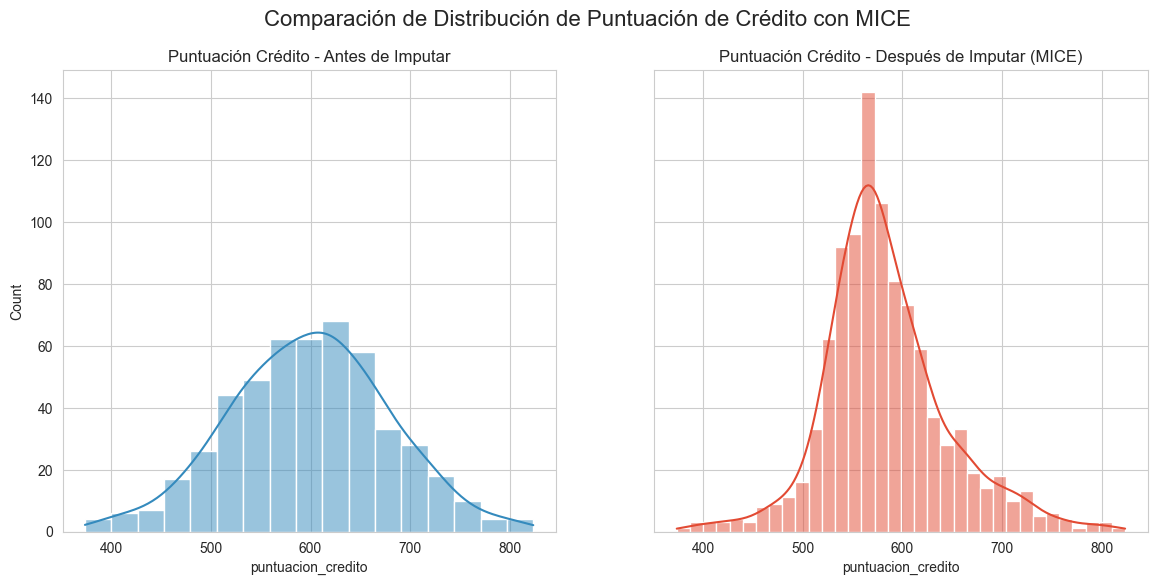

In [44]:
# Graficos para puntuacion_credito con MICE
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(df['puntuacion_credito'].dropna(), kde=True, ax=axes[0], color=PALETA['antes'])
axes[0].set_title('Puntuación Crédito - Antes de Imputar')
sns.histplot(df_imputado_mice['puntuacion_credito'], kde=True, ax=axes[1], color=PALETA['despues_peligro'])
axes[1].set_title('Puntuación Crédito - Después de Imputar (MICE)')
plt.suptitle('Comparación de Distribución de Puntuación de Crédito con MICE', fontsize=16)
plt.show()

In [25]:
evaluar_imputacion(df, df_imputado_mice, 'puntuacion_credito')

--- Evaluación para la columna: puntuacion_credito ---

1. Prueba de Normalidad (Shapiro-Wilk) para datos originales:
   Estadístico = 0.998, p-valor = 9.405e-01
   Conclusión: No se puede rechazar que los datos originales sigan una distribución normal (p >= 0.05).

2. Prueba de Igualdad de Distribuciones (Kolmogorov-Smirnov):
   Estadístico = 0.197, p-valor = 9.493e-12
   Conclusión: Las distribuciones antes y después de imputar son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).

3. Prueba de Comparación de Centralidad:
   Aplicando t-test de Student (asumiendo normalidad):
   Estadístico = 3.888, p-valor = 1.093e-04
   Conclusión: Las medias son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).
--------------------------------------------------


## **2. LightGBM**

In [45]:
import lightgbm as lgb

# Suponemos que df_imputado es tu dataframe con imputaciones simples para las otras variables
df_mice_lgbm = df_imputado.copy()

# 1. Crear el indicador de ausencia (¡sigue siendo crucial!)
df_mice_lgbm['puntuacion_credito_is_missing'] = df['puntuacion_credito'].isnull().astype(int)

# 2. Separar datos para entrenar el modelo de imputación
X = df_mice_lgbm.drop(columns=['puntuacion_credito'])
y = df_mice_lgbm['puntuacion_credito']

# Convertir categóricas a numéricas si es necesario para LightGBM
# (pd.get_dummies o similar)
X = pd.get_dummies(X, drop_first=True)

# Datos de entrenamiento son las filas donde 'puntuacion_credito' NO era nulo
X_train = X[~df['puntuacion_credito'].isnull()]
y_train = y[~df['puntuacion_credito'].isnull()]

# Datos a predecir son las filas donde 'puntuacion_credito' ERA nulo
X_to_impute = X[df['puntuacion_credito'].isnull()]

# 3. Entrenar un modelo potente
lgbm_imputer = lgb.LGBMRegressor(random_state=42, verbose=-1)
lgbm_imputer.fit(X_train, y_train)

# 4. Predecir e imputar
imputed_values = lgbm_imputer.predict(X_to_impute)

# 5. Rellenar los valores en el dataframe
df_mice_lgbm.loc[df['puntuacion_credito'].isnull(), 'puntuacion_credito'] = imputed_values


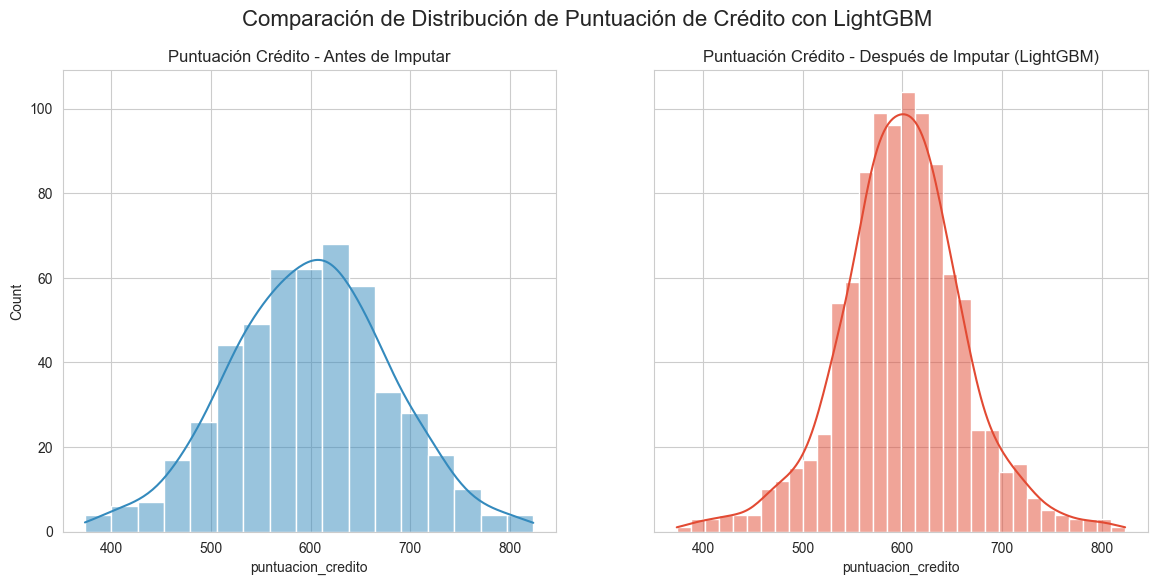

In [46]:
# Graficos para puntuacion_credito con lightgbm
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(df['puntuacion_credito'].dropna(), kde=True, ax=axes[0], color=PALETA['antes'])
axes[0].set_title('Puntuación Crédito - Antes de Imputar')
sns.histplot(df_mice_lgbm['puntuacion_credito'], kde=True, ax=axes[1], color=PALETA['despues_peligro'])
axes[1].set_title('Puntuación Crédito - Después de Imputar (LightGBM)')
plt.suptitle('Comparación de Distribución de Puntuación de Crédito con LightGBM', fontsize=16)
plt.show()

In [28]:
evaluar_imputacion(df, df_mice_lgbm, 'puntuacion_credito')

--- Evaluación para la columna: puntuacion_credito ---

1. Prueba de Normalidad (Shapiro-Wilk) para datos originales:
   Estadístico = 0.998, p-valor = 9.405e-01
   Conclusión: No se puede rechazar que los datos originales sigan una distribución normal (p >= 0.05).

2. Prueba de Igualdad de Distribuciones (Kolmogorov-Smirnov):
   Estadístico = 0.091, p-valor = 7.816e-03
   Conclusión: Las distribuciones antes y después de imputar son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).

3. Prueba de Comparación de Centralidad:
   Aplicando t-test de Student (asumiendo normalidad):
   Estadístico = -0.120, p-valor = 9.047e-01
   Conclusión: No hay evidencia de diferencia significativa entre las medias (p >= 0.05).
--------------------------------------------------


## **3. GAIN**

GAIN (Missing Data Imputation using Generative Adversarial Nets)  utiliza un enfoque de competencia entre un Generador, que rellena los datos faltantes, y un Discriminador, que intenta descubrir qué datos son reales y cuáles son imputados. La clave de su éxito es un mecanismo de pistas que guía al Discriminador, forzando al Generador a aprender la distribución verdadera de los datos. Además, el Generador no solo aprende a engañar, sino también a reconstruir los datos conocidos, lo que mejora significativamente la calidad de las imputaciones {cite:p}`yoon2018gain`.

100%|██████████| 5000/5000 [00:07<00:00, 641.04it/s]


--- Imputación con GAIN completada. Visualizando resultados... ---


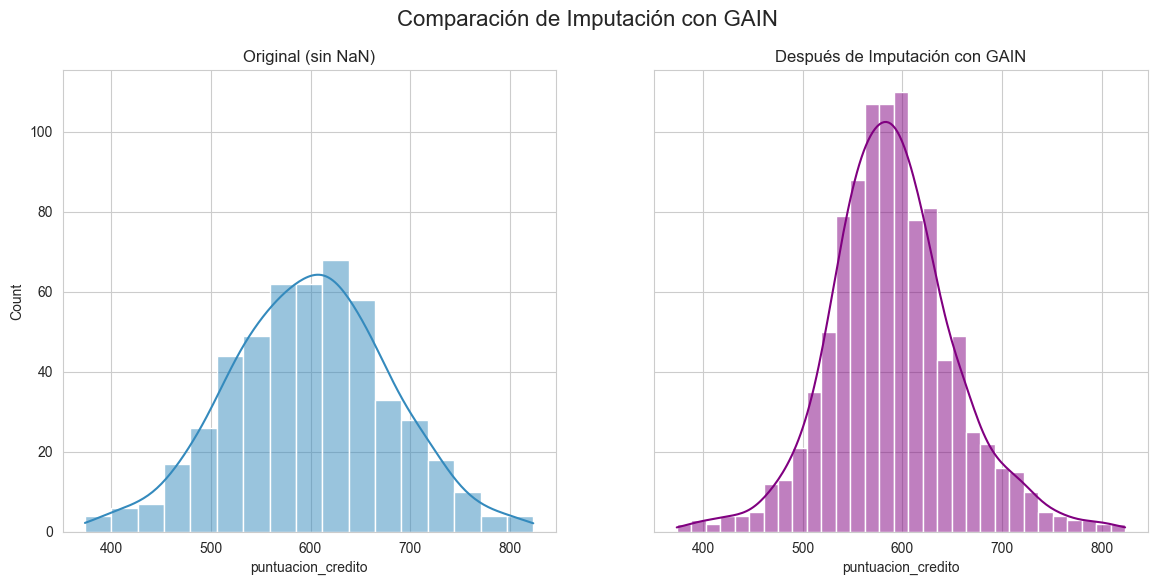

In [34]:
# --- Código para Imputación con GAIN ---
from sklearn.preprocessing import MinMaxScaler
import sys
# Asegúrate de que la ruta a GAIN esté en sys.path
sys.path.append('C:/Users/Jose/Documents/GitHub/GAIN')
path_to_gain_code = 'C:/Users/Jose/Documents/GitHub/GAIN'

from gain import gain

# --- 1. Preparación de Datos ---
df_gain = df.copy()
numeric_cols = df_gain.select_dtypes(include=np.number).columns.tolist()
df_numeric = df_gain[numeric_cols]
original_index = df_numeric.index
original_columns = df_numeric.columns

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

# --- 2. Configurar y Ejecutar GAIN ---
gain_parameters = {
'batch_size': 128,
'hint_rate': 0.9,
'alpha': 100,
'iterations': 5000
}
imputed_data = gain(df_scaled, gain_parameters)

# --- 3. Revertir la Normalización y Reconstruir ---
imputed_data_rescaled = scaler.inverse_transform(imputed_data)
df_imputed_gain = pd.DataFrame(imputed_data_rescaled,
   index=original_index,
   columns=original_columns)

# --- 4. Evaluación ---
print("--- Imputación con GAIN completada. Visualizando resultados... ---")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(df['puntuacion_credito'].dropna(), ax=axes[0], color='#348ABD', kde=True).set_title('Original (sin NaN)')
sns.histplot(df_imputed_gain['puntuacion_credito'], ax=axes[1], color='purple', kde=True).set_title('Después de Imputación con GAIN')
plt.suptitle('Comparación de Imputación con GAIN', fontsize=16)
plt.show()

In [35]:
evaluar_imputacion(df, df_imputed_gain, 'puntuacion_credito')

--- Evaluación para la columna: puntuacion_credito ---

1. Prueba de Normalidad (Shapiro-Wilk) para datos originales:
   Estadístico = 0.998, p-valor = 9.405e-01
   Conclusión: No se puede rechazar que los datos originales sigan una distribución normal (p >= 0.05).

2. Prueba de Igualdad de Distribuciones (Kolmogorov-Smirnov):
   Estadístico = 0.124, p-valor = 6.740e-05
   Conclusión: Las distribuciones antes y después de imputar son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).

3. Prueba de Comparación de Centralidad:
   Aplicando t-test de Student (asumiendo normalidad):
   Estadístico = 2.195, p-valor = 2.844e-02
   Conclusión: Las medias son SIGNIFICATIVAMENTE DIFERENTES (p < 0.05).
--------------------------------------------------


## **Conclusiones para `puntuacion_credito`**

### **Conclusión: El Arte de Torturar los Datos Hasta que Confiesen una Mentira**

Tras someter la variable `puntuacion_credito` a un escuadrón de fusilamiento algorítmico—desde el simple vecino (KNN) hasta la burocracia estadística (MICE), el esteroide de caja negra (LightGBM) y la inteligencia artificial de moda (GAIN)—la conclusión es brutalmente clara.

El problema no es el método; el problema es la realidad.

Con un 50% de los datos ausentes bajo una fuerte sospecha de ser MNAR (la gente con mal crédito o sin crédito simplemente no lo reporta), intentar imputar `puntuacion_credito` es pedir a un algoritmo que lea la mente de gente que deliberadamente no quiso hablar.

Aunque LightGBM parece ser más comedido, al final la validación estadistica demuestra lo evidente.

**Veredicto final:** La imputación de `puntuacion_credito` no ha visto luz. La única decisión honesta es declararla no recuperable. Las conclusiones que saque de ella será, en el mejor de los casos, una mentira bien estructurada.

### **Tabla Resumen**


| Variable             | % Nulos (antes) | Tipo de Ausencia (Hipótesis) | Método de Imputación Aplicado        | ¿Mantiene Distribución?                                         |
| :------------------- | :------ | :--------------------------- | :----------------------------------- | :------------------------------------------------------------------------- |
| **altura_cm**        | 2%      | MCAR                         | Mediana                              | **Sí**. K-S p=0.413, t-test p=0.993 (sin diferencia)                         |
| **edad**             | 4%      | MCAR                         | Mediana                              | **Sí**. (Evaluado) K-S y Mann-Whitney p > 0.05. Método robusto.             |
| **ciudad**           | 5%      | MCAR                         | Moda                                 | **Sí**. (Evaluado) Chi-Cuadrado p > 0.05.                                  |
| **sexo**             | 8%      | MCAR                         | Moda                                 | **Sí**. (Evaluado) Chi-Cuadrado p > 0.05.                                  |
| **nivel_educativo**  | 10%     | MNAR                         | Moda                                 | **No**. (Evaluado) Chi-Cuadrado p < 0.05.  |
| **estado_civil**     | 35%     | MNAR                         | Nueva categoría 'No Informado'       | **Sí**. Visualización muestra preservación de categorías originales.         |
| **segmento**         | 20%     | MAR                          | Moda agrupada por `ciudad`       | **No**. (Evaluado) Chi-Cuadrado p < 0.05.                                  |
| **ingresos**         | 12%     | MNAR                         | KNN Multivariado                     | **Sí**. K-S p=0.968, t-test p=0.568 (sin diferencia)                         |
| **demanda**          | 15%     | MAR/MNAR                     | KNN Multivariado                 | **Sí**. (Evaluado) K-S y t-test p > 0.05.                                   |
| **gasto_mensual**    | 25%     | MNAR                         | KNN Multivariado                     | **Sí**. K-S p=0.119, t-test p=0.387 (sin diferencia)                         |
| **puntuacion_credito**| 50%     | MNAR                         | KNN, MICE, lightgbm, GAIN         | **No**. K-S p < 0.05(diferencia)                       |
| **fecha**            | 0%      | -                            | -                                    | Imputación no necesaria                                                    |
